# 관람객 감정분석

In [1]:
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import numpy as np
import pandas as pd
from konlpy.tag import Okt
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 전처리 파일 불러오기

In [2]:
file = 'C:/coding/multicampus/프로젝트_주간_3조/범죄도시2_네이버영화_관람객리뷰.csv'
encoding='utf8'
rev = pd.read_csv(file, encoding=encoding)
rev = rev.drop('Unnamed: 0', axis=1)
rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27343 entries, 0 to 27342
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ratings  27343 non-null  int64 
 1   reviews  25414 non-null  object
dtypes: int64(1), object(1)
memory usage: 427.4+ KB


## 전처리 함수

In [3]:
#토큰화
def clean_review_konlpy(text, tagset):
    okt=Okt()
    words=[]
    for word in okt.pos(text, stem=True):
        if (tagset == None) or (word[0] in '손 석 구 강 해 상 장 이 수') :
            words.append(word[0])
        else:
            if (len(word[0])>1) and (word[1] in tagset) :
                words.append(word[0])
    return words

#데이터 전처리
def review_preproces_ko(data, stop_words, tagset):
    data = str(data)
    if '스포일러가 포함된 감상평입니다. 감상평 보기' in data:
        data = data.replace('스포일러가 포함된 감상평입니다. 감상평 보기', '')
    line_text = re.sub(r"[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]", " ", data) # 한글 외 특수문자 제거
    
    words=clean_review_konlpy(line_text, tagset)   # 토큰화
    
    if ('손' in words)or('석' in words)or('구' in words)or('강' in words)or('해' in words)or('상' in words)or('장' in words)or('이' in words)or('수' in words) :
        word_join = ' '.join(words)
        if '손 석 구도' in word_join :
            word_join = word_join.replace('손 석 구도', '손석구')
        elif '손 석 구의' in word_join :
            word_join = word_join.replace('손 석 구의', '손석구')
        elif '손 석 구도' in word_join :
            word_join = word_join.replace('손 석 구도', '손석구')
        elif '손 석 구씨' in word_join :
            word_join = word_join.replace('손 석 구씨', '손석구')
        elif '손 석 구가' in word_join :
            word_join = word_join.replace('손 석 구가', '손석구')
        elif '손 석 구만' in word_join :
            word_join = word_join.replace('손 석 구만', '손석구')
        elif '손 석 구' in word_join :
            word_join = word_join.replace('손 석 구', '손석구')
        elif '강해 상의' in word_join :
            word_join = word_join.replace('강해 상의', '강해상')
        elif '강해 상이' in word_join :
            word_join = word_join.replace('강해 상이', '강해상')
        elif '강 해상도' in word_join :
            word_join = word_join.replace('강 해상도', '강해상')
        elif '강 해상' in word_join :
            word_join = word_join.replace('강 해상', '강해상')
        elif '강 해 상'in word_join :
            word_join = word_join.replace('강 해 상', '강해상')
        elif '장 이 수도' in word_join :
            word_join = word_join.replace('장 이 수도', '장이수')
        elif '고장 이수' in word_join :
            word_join = word_join.replace('고장 이수', '장이수')
        elif '장 이수역' in word_join :
            word_join = word_join.replace('장 이수역', '장이수')
        elif '장 이 수의' in word_join :
            word_join = word_join.replace('장 이 수의', '장이수')
        elif '장 이수' in word_join :
            word_join = word_join.replace('장 이수', '장이수')
        elif '장 이 수' in word_join :
            word_join = word_join.replace('장 이 수', '장이수')
        else:
            pass
        words = word_join.split(' ')
    
    words = [w for w in words if not w in stop_words] #불용어 제거
    return words

# 불용어처리

In [4]:
# 불용어처리
pop_word = ['장', '이', '손', '석', '구', '강', '해', '상', '수']

f = open('c:/coding/multicampus/datas/한글 불용어.txt', 'r', encoding='utf8')
stop_words = f.read().splitlines()
[stop_words.append(stop) for stop in pop_word]
print(len(stop_words))

684


# 전처리 작업

In [5]:
#없음 None, 1개 str, 2개이상 list
tagset = None
col = 'reviews'
results =[]

for line in rev[col]: #전체 데이터 전처리
    result = review_preproces_ko(line, stop_words, tagset)
    results.append(result)

data = np.concatenate(results).tolist() #1차원 리스트로 축소

# 리뷰 별 리스트 원소 합치기
rev_joins = []
for result in results:
    rev_join = ' '.join(result)
    rev_joins.append(rev_join)
    
# clean dataframe 생성 & 데이터 저장
clean_rev = pd.DataFrame({'ratings':rev['ratings'], 'reviews':rev['reviews'], 'clean_reviews':rev_joins})
clean_rev.to_excel('감정분석_모델용_네이버_범죄도시2_토큰화.xlsx')
clean_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27343 entries, 0 to 27342
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ratings        27343 non-null  int64 
 1   reviews        25414 non-null  object
 2   clean_reviews  27343 non-null  object
dtypes: int64(1), object(2)
memory usage: 641.0+ KB


> 평점만 존재하고 내용은 없는 리뷰 삭제 & 부분 저장

In [6]:
clean_rev_del = clean_rev.drop_duplicates(subset=['reviews'])
clean_rev_del.reset_index(inplace=True)
clean_rev_del.drop('index', axis=1, inplace=True)
clean_rev_del.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25084 entries, 0 to 25083
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ratings        25084 non-null  int64 
 1   reviews        25083 non-null  object
 2   clean_reviews  25084 non-null  object
dtypes: int64(1), object(2)
memory usage: 588.0+ KB


C:\Users\user\AppData\Local\Temp\ipykernel_11336\2686948618.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_rev_del.drop('index', axis=1, inplace=True)


In [7]:
clean_rev_del.loc[clean_rev_del.reviews.isnull()]

,ratings,reviews,clean_reviews
1010,10,NaN,


In [8]:
train_data = clean_rev_del.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인
print(len(train_data))

False
25083


In [9]:
#토큰화 완료 데이터 저장
clean_rev_del.to_excel('감정분석_모델용_네이버_범죄도시2_내용x삭제.xlsx') 

# 감정분석 추가

In [10]:
positive_a = ['재밌다', '좋다', '시원하다', '통쾌하다', '미치다', '기대하다', '시원시원하다', '시원시원', 
            '많이', '강하다', '이렇게', '멋지다', '좋아하다', '완벽하다', '엄청나다', '쏠쏠하다', '재밌었어요',
            '솔직하다', '멋있다', '즐겁다', '훨씬', '만족하다',  '강력하다', '치밀하다', '필요하다', 
            '유쾌하다', '괜찮다', '확실하다', '야하다', '충분하다', '만족스럽다', '어마어마하다', '지루함 없이',
            '비슷하다', '화끈하다', '적절하다', '훌륭하다', '궁금하다', '색다르다', '장난없다', '지루하지 않고',
            '빠르다', '탄탄하다', '새롭다', '깔끔하다', '쎄다',  '성공하다', '대단하다', '담백하다', '재미 있네요',
            '강렬하다', '적당하다', '귀엽다', '편하다', '짜릿하다', '못지않다',  '곱다', '딱이다', '꽉꽉',
            '굉장하다', '찰지다', '반하다', '후련하다', '신나다', '빵터지다', '화려하다', '알차다', '건강하다',
            '뛰어나다', '잘생기다', '신선하다', '자연스럽다', '행복하다', '반갑다', '상당하다', '조아', '충실하다', 
            '드디어', '너무나도', '유머러스하다', '다양하다', '당연하다', '맛있다', '착하다', '잘맞다', '드물다',
            '끝내주다', '언제나', '든든하다', '완전하다', '편안하다', '중요하다', '정확하다', '설레다', '놀래다', 
            '영리하다', '가득하다', '소소하다', '유일하다', '맛깔나다', '흥미롭다', '그립다', '첨으로', '굿',
            '고맙다', '특별하다', '정말로', '잔잔하다', '신기하다', '개웃',  '아주아주', '안 지루함','굳',
            '풍부하다', '상쾌하다', '매끄럽다', '사랑스럽다', '열광하다', '굳다', '진정하다', '의외로', '나쁘진 않',
            '부탁드리다', '가능하다', '명쾌하다', '명료하다', '겯쾌하다', '거뜬하다']

positive_nn = ['최고', '정말', '역시', '코믹', '웃음', '격감', '대박', '추천', '간만', '유머',
               '매력', '존잼', '강추', '명작', '재밋음', '만족', '감탄','짱짱','유쾌', '재밋어',
               '재미나', '재밋', '웃기', '빵빵',  '개꿀잼', '사이다', '시원', '통쾌',  '순삭', '진심', '쵝오',
               '굿굿', '최고다', '흥미진진', '화이팅', '만점',  '상쾌', '졸잼', '압도', '박수','잼있', '잼 있',
               '레전드', '소름', '추앙']

negative_a = ['부족하다', '지루', '망하다', '답답하다', '재미없', '재미 없', '아쉽', 'ㄴㄴ', '허무해서'
            '밉다', '어색하다', '힘들다', '안되다', '힘드다', '덜하다','나쁘다', '약하다', '똑같다', '허무하다'
            '아깝다', '추하다', '아쉽다', '뻔하다', '유치', '단순하다', '짧다', '살벌하다',
            '낮다', '잔혹하다', '불편하다', '어설프다', '식상하다', '진부하다', '이상하다', '불쌍하다', '싫다', 
            '심하다', '괜히', '딱하다', '싫어하다', '시끄럽다', '실패하다', '안타깝다', '부실하다', '시원찮긴',
            '빈약하다', '무리다', '비싸다', '안쓰럽다', '어쩌나', '섬뜩하다', '불필요하다', '차갑다', '징그럽다', 
            '어둡다', '맵다', '심각하다', '쓰리다', '마르다', '쓸데없이', '흠잡다', '어이없다', '무자비하다', 
            '끔찍하다', '평범하다', '쓸데없다', '복잡하다', '불안하다', '피곤하다', '억지스럽다', '흔하다', '작다',
            '길다', '부자연스럽다', '급하다', '우울하다', '안좋다', '심심하다', '짜증나다', '가볍다', '그럭저럭',
            '익숙하다', '힘드다', '재밌진 않', '때우기', '잼 없', '잼없']

negative_nn = ['아쉬움', '억지', '별로', '노잼', '비추', '쓰레기']

positive = positive_a + positive_nn
negative = negative_a + negative_nn

> 평점 중 10과 1점은 제외 후 감정분석 실시

In [84]:
def sentiment_list(df, rating_name):
    pos_count = []
    neg_count = []
    sentiment = []
    index = 0
    for rating in df[rating_name] :
        pos = 0
        neg = 0
        if rating == 10:
            pos_count.append(pos)
            neg_count.append(neg)
            sentiment.append(1)
        elif rating == 1 :
            pos_count.append(pos)
            neg_count.append(neg)
            sentiment.append(-1)
        else:
            for p in positive:
                if p in str(df.loc[index, 'clean_reviews']):
                    pos += 1
            for n in negative:
                if n in str(df.loc[index, 'clean_reviews']):
                    neg += -1
            pos_count.append(pos)
            neg_count.append(neg)
            if pos+neg >= 1:
                sentiment.append(1)
            elif pos+neg == 0:
                sentiment.append(0)
            else:
                sentiment.append(-1)
        index+=1
    return [pos_count, neg_count, sentiment]

In [12]:
sen_list = sentiment_list(clean_rev_del, 'ratings')
clean_rev_del['pos_count'] = sen_list[0]
clean_rev_del['neg_count'] = sen_list[1]
clean_rev_del['sentiment'] = sen_list[2]
clean_rev_del.head()

C:\Users\user\AppData\Local\Temp\ipykernel_11336\2779218699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_rev_del['pos_count'] = sen_list[0]
C:\Users\user\AppData\Local\Temp\ipykernel_11336\2779218699.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_rev_del['neg_count'] = sen_list[1]
C:\Users\user\AppData\Local\Temp\ipykernel_11336\2779218699.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

,ratings,reviews,clean_reviews,pos_count,neg_count,sentiment
0,10,이 영화의 속편은 100% 성공이다. 원래 한국영화들 속편은 잘 안되고 속편 나오면...,영화 속편 은 성공 이다 원래 한국 영화 속편 은 자다 안되다 속편 나오다 망하다 ...,0,0,1
1,10,시리즈로 계속 나왔으면 좋겠다. 마동석한테 최적화된 작품이다.,시리즈 계속 나오다 좋다 마동석 한테 최적화 되다 작품 이다,0,0,1
2,8,니가 강해상이냐? 아뇨. 구씬데요?,니 강하다 상이 냐 아뇨 구씬데 요,1,0,1
3,10,전편을 보고 가야 장이수 얼굴만 봐도 웃음이 나오는 이유를 알 수 있습니다:),전편 보고 가야 장이수 얼굴 만 보다 웃음 나오다 이유 알,0,0,1
4,9,와…. 손석구 연기 진짜 미쳣다…오바하는 범죄자연기가 아니라 ㄹㅇ 범죄자같음,오다 손석구 연기 진짜 미쳣다 바하 는 범죄자 연기 아니다 ㄹㅇ 범죄자,0,0,0


In [13]:
clean_rev_del[clean_rev_del['sentiment']==0].sentiment.count()

1856

## 긍부정 감정 리스트 추가 설정 및 분류
> sentiment==0 인 리뷰들 중 9점(긍정), 3점이하(부정)으로 나눠서 많이 나온 단어 추출

In [14]:
pos_plus = ['좋다', '충분하다', '즐겁다', '가볍다', '화끈하다',  '미치다', '성공하다', '강하다', '재밌음', '재미있는',
            '약하다', '못지않다', '탄탄하다', '새롭다','완벽하다', '신나다', '깔끔하다', '멋지다', '더 나음', '보다 나은',
            '적절하다', '시원하다', '강력하다',  '적당하다', '힘드다', '상당하다', '빠르다', '든든하다', 'ㅋㅋㅋㅋ', 'ㅋㅋㅋ',
            '굉장하다', '더하다', '짜릿하다', '강렬하다', '단순하다', '찰지다', '다르다', '편하다', '후련하다', 
            '필요없다', '편안하다', '복잡하다',  '정확하다', '심심하다',  '어렵다', '신선하다', 'ㅋㅋ', '꿀잼',
            '유사하다', '가능하다', '어쩔', '뛰어나다', '변하다', '평범하다', '악랄하다',  '악하다', '추하다', 
            '무자비하다', '파닥파닥', '간결하다', '안남다', '길다', '만족하다', '고프다', '익숙하다', '영리하다', '반하다', 
            '충실하다', '진정하다', '아름답다', '자세하다', '선하다', '펀하다', '쿨하다', '색다르다', '원하다', '찝찝하다', 
            '틀림없다', '귀엽다', '잘나다', '섬뜩하다', '딱하다', '부실하다', '살벌하다', '오랫동안', '넓다', '식상하다', '정당하다', 
            '누굴까', '유일하다', '어눌하다', '마르다', '젊다', '딴딴하다', '미안하다', '다양하다', '화려하다', '잔악하다', '심약하다', '여전하다', 
            '진하다', '안쓰럽다', '징그럽다', '우락부락하다', '무리다', '섬세하다', '멍청하다', '튼튼하다', '동일하다', 
            '진부하다', '안녕하다',  '허무하다', '실패하다', '두둑하다', '끝내주다',  '간단하다',   '빵터지다', 
            '흠잡다', '거뜬하다', '투명하다', '딱이다', '꾸준하다', '흥분하다', '조용하다', '차분하다', '서늘하다', '불행하다', '상관없다', '하기는', 
            '평탄하다', '반갑다', '낑기다',  '심오하다', '카타르 시스', 'ㅎㅎ',  '짱','웃기','기다리다', '심오', '수작', '좋은데', '여운']

neg_plus = ['없다', '유치하다', '똑같다', '끔찍하다', '중요하다', '부끄럽다', '그만하다', '빈약하다', '어이없',
            '강하다', '힘겹다', '진지하다', '멀다', '억지스럽다', '짠하다', '드럽다', '유치하다','알바', 'ㅡㅡ', 'ㅋ', '단순하다', '아쉬움', '움',
            '괴롭다', '참신하다', '당연하다', '퇴보하다', '천박하다', '공허하다', '어떡하다', '착하다', '저급하다', '그립다', '너무하다',
            '더럽다','한심하다', '괜히', '다분하다', '멀쩡하다', '검다', '아니꼽다', '간지럽다', '자만하다',  '무모하다','뻔하다','그럭저럭', 
            '맵다', '작다', '불가하다', '없이', '무식하다', '싱겁다', '궁금하다',  '매끄럽다','아깝다', '부족하다', '실망', '어설프다',
            '죄다', '밋밋하다', '나아', '어딜', '미미하다', '졸작', '별로', '어색하다','지루하다', '쓰레기']

> 더욱 정확한 분류를 위해 sentiment==0 인 리뷰들만 맞춤법 교정 후 추가 분류

In [15]:
from hanspell import spell_checker
index = 0
for s in clean_rev_del['sentiment'] :
    if s == 0:
        sent = clean_rev_del.loc[index, 'reviews']
        line_text = re.sub(r"[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]", " ", sent)
        spelled_sent = spell_checker.check(line_text)
        hanspell_sent = spelled_sent.checked
        clean_review = review_preproces_ko(hanspell_sent, stop_words, None)
        
        for p in pos_plus:
            if p in clean_review:
                clean_rev_del.loc[index,'pos_count']= 1
        for n in neg_plus:
            if n in clean_review:
                clean_rev_del.loc[index,'neg_count'] = -1

        if clean_rev_del.loc[index,'pos_count']+clean_rev_del.loc[index,'neg_count'] >= 1:
            clean_rev_del.loc[index,'sentiment']= 1
        elif clean_rev_del.loc[index,'pos_count']+clean_rev_del.loc[index,'neg_count'] == 0:
            clean_rev_del.loc[index,'sentiment']= 0
        else:
            clean_rev_del.loc[index,'sentiment']= -1
        
        if ('손석구' in clean_review) or ('마동석' in clean_review) and (clean_rev_del.loc[index, 'ratings'] >= 8):
            clean_rev_del.loc[index,'sentiment']= 1
        elif ('손석구' in clean_review) or ('마동석' in clean_review) and (clean_rev_del.loc[index, 'ratings'] < 5):
            clean_rev_del.loc[index,'sentiment'] = -1
        elif '잔인' in clean_review or '힘들다' in clean_review or '필요' in clean_review or '잔혹' in clean_review or '잔인' in clean_review or '불편' in clean_review  or '무섭' in clean_review  or '깊다' in clean_review and clean_rev_del.loc[index, 'ratings'] >= 8:
            clean_rev_del.loc[index,'sentiment'] = 1
        elif '잔인' in clean_review or '힘들다' in clean_review or '필요' in clean_review or '잔혹' in clean_review or '잔인' in clean_review or '불편' in clean_review  or '무섭' in clean_review  or '깊다' in clean_review and clean_rev_del.loc[index,'ratings'] < 5:
            clean_rev_del.loc[index,'sentiment'] = -1
        elif '재밌' in clean_review or '재미있다' in clean_review or '기대' in clean_review or '멋있다' in clean_review or '훌륭하다' in clean_review or '괜찮다'in clean_review and clean_rev_del.loc[index,'ratings'] >= 8:
            clean_rev_del.loc[index,'sentiment'] = 1
        elif '재밌' in clean_review or '재미있다' in clean_review or '기대' in clean_review or '멋있다' in clean_review or '훌륭하다' in clean_review or '괜찮다'in clean_review and clean_rev_del.loc[index,'ratings'] < 5:
            clean_rev_del.loc[index,'sentiment'] = -1
        elif '연기' in clean_review or 'ㅜㅜ' in clean_review or 'ㅠㅠ' in clean_review or '웃음' in clean_review or '킬링' in clean_review or '킬링타임' in clean_review or '장첸' in clean_review or '시리즈' in clean_review or '적합하다' in clean_review or '애드립' in clean_review and (clean_rev_del.loc[index, 'ratings'] >= 8):
            clean_rev_del.loc[index, 'sentiment'] = 1
        elif '연기' in clean_review or 'ㅜㅜ' in clean_review or 'ㅠㅠ' in clean_review or '웃음' in clean_review or '킬링' in clean_review or '킬링타임' in clean_review or '장첸' in clean_review or '시리즈' in clean_review or '적합하다' in clean_review or '애드립' in clean_review and (clean_rev_del.loc[index, 'ratings'] < 5):
            clean_rev_del.loc[index, 'sentiment'] = -1
        else:
            pass
    index+=1

In [32]:
zero = clean_rev_del[clean_rev_del['sentiment']==0].sentiment.count()
zero

826

In [54]:
clean_rev_del[clean_rev_del['sentiment']==0].groupby('ratings').size()

ratings
2     65
3      4
4     43
5     29
6    140
7    130
8    243
9    172
dtype: int64

In [16]:
# 감정분류 완료한 파일 저장
clean_rev_del.to_excel('감정분석_모델용_네이버_범죄도시2_관람객.xlsx')

# 잘못 분류되는 이슈 존재
> 해결하기엔 어려움

In [62]:
p_but_n = clean_rev_del.loc[(clean_rev_del['ratings']>=8)&(clean_rev_del['sentiment']<=-1)].sentiment.count()
n_but_p = clean_rev_del.loc[(clean_rev_del['ratings']<=5)&(clean_rev_del['sentiment']>=1)].sentiment.count()
print(p_but_n, n_but_p)
print('총 오차율 :', round((p_but_n + n_but_p + zero)/clean_rev_del.sentiment.count()*100, 2))

292 310
총 오차율 : 5.69


# 전체 리뷰 호감도 분석

In [63]:
all = pd.DataFrame(clean_rev_del['sentiment'].value_counts())
all.reset_index()

,index,sentiment
0,1,23140
1,-1,1118
2,0,826


In [64]:
def sns_width(width, char):
    for bar in char.patches:
        x = bar.get_x() # 막대 좌측 하단 x 좌표
        old_width = bar.get_width() # 기존 막대 폭
        bar.set_width(width) # 폭변경
        bar.set_x(x+(old_width-width)/2) # 막대 좌측 하단 x 좌표 업데이트

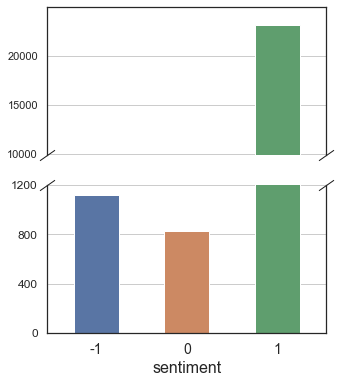

In [65]:
# dataset
all = pd.DataFrame(clean_rev_del['sentiment'].value_counts())
all.reset_index(inplace=True)

# setting figure
sns.set(rc={"figure.figsize":(5,6)})
sns.set_style("white")

# subplot
f, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True)

# making yaxis grid
ax1.yaxis.grid()
ax2.yaxis.grid()

# making barplot for each subplot ax1 and ax2
ax1 = sns.barplot(x='index', y='sentiment', data = all, ax=ax1)
ax2 = sns.barplot(x='index', y='sentiment', data = all, ax=ax2)

# chaging widths
width = 0.5
sns_width(width, ax1)
sns_width(width, ax2)

plt.xticks(size = 14)
plt.yticks(size = 12)

ax1.set_ylim(9900, 25000)
ax2.set_ylim(0, 1200)

ax1.set_yticks([10000, 15000, 20000])
ax2.set_yticks([0, 400, 800, 1200])

ax1.set_ylabel("")
ax2.set_ylabel("")

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)

# how big to make the diagonal lines in axes coordinates(/표시)
d = .7    
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=15, linestyle="none", color='k', clip_on=False)

ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax1.set_xlabel("")
ax2.set_xlabel("sentiment", fontsize = "16")

#plt.savefig("result.pdf")
plt.show()

# 워드 클라우드 분석
> 가장 높은 빈도의 단어 호감도 확인
1. 마동석
2. 연기
3. 액션, 범죄
4. 손석구

In [66]:
def word_favorability(word):
    idx = 0
    p_cnt = 0
    n_cnt = 0
    cnt = 0
    for c_rev in clean_rev_del['clean_reviews']:
        if word in c_rev :
            cnt += 1
            if clean_rev_del.loc[idx, 'sentiment'] >= 1:
                p_cnt += 1
            elif clean_rev_del.loc[idx, 'sentiment'] <= -1:
                n_cnt += -1  
        idx += 1
    avg = round((p_cnt + n_cnt)/cnt *100, 2)
    return [avg, p_cnt, n_cnt, cnt]

In [67]:
word = '마동석'
f = word_favorability(word)
print(f'{word}을 언급한 리뷰의 호감도 평균 :', f[0])
print(f'{word}을 언급한 호감리뷰 수 :', f[1])
print(f'{word}을 언급한 비호감리뷰 수 :', -f[2])
print(f'{word}을 언급한 리뷰 수 :', f[3])

마동석을 언급한 리뷰의 호감도 평균 : 89.41
마동석을 언급한 호감리뷰 수 : 3805
마동석을 언급한 비호감리뷰 수 : 190
마동석을 언급한 리뷰 수 : 4043


In [68]:
word = '연기'
f = word_favorability(word)
print(f'{word}을 언급한 리뷰의 호감도 평균 :', f[0])
print(f'{word}을 언급한 호감리뷰 수 :', f[1])
print(f'{word}을 언급한 비호감리뷰 수 :', -f[2])
print(f'{word}을 언급한 리뷰 수 :', f[3])

연기을 언급한 리뷰의 호감도 평균 : 93.21
연기을 언급한 호감리뷰 수 : 3282
연기을 언급한 비호감리뷰 수 : 113
연기을 언급한 리뷰 수 : 3400


In [69]:
word = '액션'
f = word_favorability(word)
print(f'{word}을 언급한 리뷰의 호감도 평균 :', f[0])
print(f'{word}을 언급한 호감리뷰 수 :', f[1])
print(f'{word}을 언급한 비호감리뷰 수 :', -f[2])
print(f'{word}을 언급한 리뷰 수 :', f[3])

액션을 언급한 리뷰의 호감도 평균 : 91.18
액션을 언급한 호감리뷰 수 : 3056
액션을 언급한 비호감리뷰 수 : 121
액션을 언급한 리뷰 수 : 3219


In [70]:
word = '범죄'
f = word_favorability(word)
print(f'{word}을 언급한 리뷰의 호감도 평균 :', f[0])
print(f'{word}을 언급한 호감리뷰 수 :', f[1])
print(f'{word}을 언급한 비호감리뷰 수 :', -f[2])
print(f'{word}을 언급한 리뷰 수 :', f[3])

범죄을 언급한 리뷰의 호감도 평균 : 87.39
범죄을 언급한 호감리뷰 수 : 1969
범죄을 언급한 비호감리뷰 수 : 104
범죄을 언급한 리뷰 수 : 2134


In [71]:
word = '손석구'
f = word_favorability(word)
print(f'{word}을 언급한 리뷰의 호감도 평균 :', f[0])
print(f'{word}을 언급한 호감리뷰 수 :', f[1])
print(f'{word}을 언급한 비호감리뷰 수 :', -f[2])
print(f'{word}을 언급한 리뷰 수 :', f[3])

손석구을 언급한 리뷰의 호감도 평균 : 94.53
손석구을 언급한 호감리뷰 수 : 3058
손석구을 언급한 비호감리뷰 수 : 83
손석구을 언급한 리뷰 수 : 3147


# 긍부정 예측 모델 적용
> 태현님 코드 & https://wikidocs.net/44249 활용

> sentiment==0 리뷰 제외
- train : 네이버 리뷰 활용
- test : 다음 리뷰 활용

In [17]:
import urllib.request
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [18]:
sen_model = clean_rev_del.copy()
sen_model.drop(sen_model[sen_model['sentiment']==0].index, inplace=True)
sen_model.reset_index(inplace=True)
sen_model = sen_model[['ratings', 'clean_reviews', 'sentiment']]
sen_model.to_excel('감정분석_모델용_네이버_범죄도시2_train.xlsx')
sen_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24258 entries, 0 to 24257
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ratings        24258 non-null  int64 
 1   clean_reviews  24258 non-null  object
 2   sentiment      24258 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 568.7+ KB


- 정수 인코딩 : 각 단어에 고유한 정수 부여

In [19]:
train_model = sen_model['clean_reviews']

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_model)
tokenizer.word_index

{'보다': 1,
 '재밌다': 2,
 '하다': 3,
 '영화': 4,
 '너무': 5,
 '마동석': 6,
 '도': 7,
 '진짜': 8,
 '연기': 9,
 '편': 10,
 '손석구': 11,
 '좋다': 12,
 '액션': 13,
 '은': 14,
 '이다': 15,
 '는': 16,
 '더': 17,
 '배우': 18,
 '재미있다': 19,
 '범죄': 20,
 '없다': 21,
 '도시': 22,
 '가다': 23,
 '만': 24,
 '다': 25,
 '나오다': 26,
 '님': 27,
 '되다': 28,
 '최고': 29,
 '한': 30,
 '않다': 31,
 '정말': 32,
 '적': 33,
 '잘': 34,
 '스토리': 35,
 '시원하다': 36,
 'ㅋㅋ': 37,
 '잔인하다': 38,
 '역시': 39,
 '안': 40,
 '그냥': 41,
 '요': 42,
 '보고': 43,
 '자다': 44,
 '넘다': 45,
 '재미': 46,
 '아니다': 47,
 '장첸': 48,
 '기대': 49,
 '오다': 50,
 '고': 51,
 '꼭': 52,
 '모르다': 53,
 '생각': 54,
 '오랜': 55,
 '웃다': 56,
 '들다': 57,
 '중간': 58,
 'ㅋㅋㅋ': 59,
 '많다': 60,
 '말': 61,
 '재다': 62,
 '게': 63,
 'ㅎㅎ': 64,
 '통쾌하다': 65,
 '영화관': 66,
 '없이': 67,
 '코믹': 68,
 '정도': 69,
 '웃음': 70,
 '웃기다': 71,
 '못': 72,
 '장면': 73,
 '번': 74,
 '타': 75,
 '볼': 76,
 '편이': 77,
 '마블리': 78,
 '인': 79,
 '시리즈': 80,
 '느낌': 81,
 '믿다': 82,
 '구씨': 83,
 '악역': 84,
 '미치다': 85,
 '격감': 86,
 '하고': 87,
 '지루하다': 88,
 '짱': 89,
 '속편': 90,
 '만들다': 91,
 '중': 9

In [20]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 11118
등장 빈도가 2번 이하인 희귀 단어의 수: 6572
단어 집합에서 희귀 단어의 비율: 59.11135096240331
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.636528028933092


In [21]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 4547


In [22]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(train_model)
train_model = tokenizer.texts_to_sequences(train_model)

In [23]:
# train1과 별도 저장
train_model_2 = np.array(sen_model['sentiment'], dtype=float)

- 빈 샘플 제거

In [24]:
drop_train1 = [index for index, sentence in enumerate(train_model) if len(sentence) < 1]

train_model = np.delete(train_model, drop_train1, axis=0)
train_model_2 = np.delete(train_model_2, drop_train1, axis=0)
print(len(train_model))
print(len(train_model_2))

24227
24227


C:\Users\user\miniconda3\lib\site-packages\numpy\lib\function_base.py:5071: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


- 패딩 작업

리뷰의 최대 길이 : 280
리뷰의 평균 길이 : 12.223180748751393


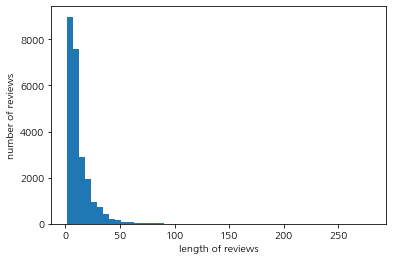

In [25]:
print('리뷰의 최대 길이 :',max(len(review) for review in train_model))
print('리뷰의 평균 길이 :',sum(map(len, train_model))/len(train_model))
plt.hist([len(review) for review in train_model], bins=50)
plt.xlabel('length of reviews')
plt.ylabel('number of reviews')
plt.show()

- 전체 샘플 중 길이가 max_len 이하인 샘플의 비율이 몇 %인지 확인

In [26]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [27]:
max_len = 40
below_threshold_len(max_len, train_model)

전체 샘플 중 길이가 40 이하인 샘플의 비율: 97.11478928468237


In [28]:
# 샘플 길이를 40으로 맞춤
train_model = pad_sequences(train_model, maxlen=max_len)

## LSTM로 감성 분류하기

In [31]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
train_model_2 = train_model_2.astype(np.float32)
history = model.fit(train_model, train_model_2, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
302/303 [============================>.] - ETA: 0s - loss: 0.1864 - acc: 0.9580
Epoch 00001: val_acc improved from -inf to 0.88547, saving model to best_model.h5
303/303 [==============================] - 14s 36ms/step - loss: 0.1865 - acc: 0.9578 - val_loss: 0.2615 - val_acc: 0.8855
Epoch 2/15
303/303 [==============================] - ETA: 0s - loss: 0.1443 - acc: 0.9421
Epoch 00002: val_acc did not improve from 0.88547
303/303 [==============================] - 10s 33ms/step - loss: 0.1443 - acc: 0.9421 - val_loss: 0.1257 - val_acc: 0.8714
Epoch 3/15
302/303 [============================>.] - ETA: 0s - loss: -0.0241 - acc: 0.9473
Epoch 00003: val_acc did not improve from 0.88547
303/303 [==============================] - 10s 33ms/step - loss: -0.0239 - acc: 0.9474 - val_loss: 0.1590 - val_acc: 0.8853
Epoch 4/15
303/303 [==============================] - ETA: 0s - loss: -0.1241 - acc: 0.9458
Epoch 00004: val_acc did not improve from 0.88547
303/303 [=======================

In [33]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(train_model, train_model_2)[1]))

758/758 [==============================] - 5s 7ms/step - loss: -0.9553 - acc: 0.9482

 테스트 정확도: 0.9482


In [38]:
def sentiment_predict(new_sentence, stop_words, tagset):
  new_sentence = review_preproces_ko(new_sentence, stop_words, tagset)
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))

In [39]:
sentiment_predict('개꿀잼ㅋㅋ', stop_words, None)

100.00% 확률로 긍정 리뷰입니다.



In [40]:
print(clean_rev_del.loc[9,'reviews'])
sentiment_predict(clean_rev_del.loc[9,'reviews'], stop_words, None)

이건 크게 잘될만하다. 
99.99% 확률로 긍정 리뷰입니다.



In [41]:
idx = 25075
print(clean_rev_del.loc[idx,'reviews'])
sentiment_predict(clean_rev_del.loc[idx,'reviews'], stop_words, None)

1편이 더 나음. 
99.91% 확률로 긍정 리뷰입니다.



In [42]:
idx = 25078
print(clean_rev_del.loc[idx,'reviews'])
sentiment_predict(clean_rev_del.loc[idx,'reviews'], stop_words, None)

대체 평점남기는애들은 영화라는걸 아는걸까??? 
99.96% 확률로 긍정 리뷰입니다.



In [43]:
idx = 25054
print(clean_rev_del.loc[idx,'reviews'])
sentiment_predict(clean_rev_del.loc[idx,'reviews'], stop_words, None)

칼질 많이 한다고 1을 넘어서는 건 아니지.그냥 흔한 마동석 쟝르중 하나가 되어버린... 
99.82% 확률로 긍정 리뷰입니다.



In [44]:
idx = 1833
print(clean_rev_del.loc[idx,'reviews'])
sentiment_predict(clean_rev_del.loc[idx,'reviews'], stop_words, None)

2022년이다..이제 이런영화 그만 만들자.. 
96.66% 확률로 부정 리뷰입니다.



In [45]:
idx = 2089
print(clean_rev_del.loc[idx,'reviews'])
sentiment_predict(clean_rev_del.loc[idx,'reviews'], stop_words, None)

재밌게 봤지만 9점대 영화는 아님ㅋ 
100.00% 확률로 긍정 리뷰입니다.



In [46]:
idx = 2313
print(clean_rev_del.loc[idx,'reviews'])
sentiment_predict(clean_rev_del.loc[idx,'reviews'], stop_words, None)

뻔한 스토리 예상되는 결말 기대가 너무 컸나.. 
99.90% 확률로 부정 리뷰입니다.



In [47]:
idx = 3352
print(clean_rev_del.loc[idx,'reviews'])
sentiment_predict(clean_rev_del.loc[idx,'reviews'], stop_words, None)

이런 영화가 천만이라고?이거 진심 1편 본 관객들이 평점 준건가?뻔한 클리세는 예상했지만,초반 작위적인 대사,연기...진심 1편에 나온 배우들이 맞나 싶음..구씨 연기력말고는 볼게 없음..그냥 c급 졸작. 
98.32% 확률로 긍정 리뷰입니다.



In [48]:
idx = 10163
print(clean_rev_del.loc[idx,'reviews'])
sentiment_predict(clean_rev_del.loc[idx,'reviews'], stop_words, None)

이게 진짜 재미있다고? 천만들었으니 할말 없다만 제작자들하고 감독은 천운을 타고난듯 
99.72% 확률로 긍정 리뷰입니다.



In [49]:
idx = 10221
print(clean_rev_del.loc[idx,'reviews'])
sentiment_predict(clean_rev_del.loc[idx,'reviews'], stop_words, None)

솔직히 재미 없었습니다.. 1편 너무 재미있게 봐서 기대했는데, 서사는 아예 없고, 어줍잖은 농담이나 하면서 몰입 다 깨고, 그냥 폭력적이고 선정적인 장면만 더 수위 높아진거 빼고 재미 없습니다. 
99.54% 확률로 부정 리뷰입니다.



In [50]:
idx = 11484
print(clean_rev_del.loc[idx,'reviews'])
sentiment_predict(clean_rev_del.loc[idx,'reviews'], stop_words, None)

약점하나 빌런두목만 쎄고 그이하 너무약함 동썩이도 위기라는것이 찾아올정도의인원과 포스가 잇엇음함 너무 뻔함 1대1설정은 30대1은 해줘야 주인공과 포스 같아짐 
100.00% 확률로 부정 리뷰입니다.



In [72]:
sentiment_predict('재미 없어요...', stop_words, None)

93.24% 확률로 긍정 리뷰입니다.



In [73]:
sentiment_predict('정말 재미없어요... 진짜 시간 낭비', stop_words, None)

100.00% 확률로 부정 리뷰입니다.



# (train으로 사용)네이버리뷰 결과 비교

In [104]:
def sentiment_predict_2(new_sentence, stop_words, tagset):
  new_sentence = review_preproces_ko(new_sentence, stop_words, tagset)
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  return score

In [105]:
sen = []
model_sentiment = []
for rev in clean_rev_del['reviews']:
    tagset = None
    score = sentiment_predict_2(rev, stop_words, tagset)
    sen.append(score)
    
    if score > 0.5:
        model_sentiment.append(1)
    elif score < 0.5:
        model_sentiment.append(-1)
    else:
        model_sentiment.append(0)

clean_rev_del['model_raw'] = sen
clean_rev_del['model_sentiment'] = model_sentiment
clean_rev_del.to_excel('감정분석_모델용_네이버_범죄도시2_test.xlsx')
clean_rev_del.head()

C:\Users\user\AppData\Local\Temp\ipykernel_11336\3246148368.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_rev_del['model_raw'] = sen
C:\Users\user\AppData\Local\Temp\ipykernel_11336\3246148368.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_rev_del['model_sentiment'] = model_sentiment


,ratings,reviews,clean_reviews,pos_count,neg_count,sentiment,model_raw,model_sentiment
0,10,이 영화의 속편은 100% 성공이다. 원래 한국영화들 속편은 잘 안되고 속편 나오면...,영화 속편 은 성공 이다 원래 한국 영화 속편 은 자다 안되다 속편 나오다 망하다 ...,0,0,1,1.000000,1
1,10,시리즈로 계속 나왔으면 좋겠다. 마동석한테 최적화된 작품이다.,시리즈 계속 나오다 좋다 마동석 한테 최적화 되다 작품 이다,0,0,1,0.999994,1
2,8,니가 강해상이냐? 아뇨. 구씬데요?,니 강하다 상이 냐 아뇨 구씬데 요,1,0,1,0.999847,1
3,10,전편을 보고 가야 장이수 얼굴만 봐도 웃음이 나오는 이유를 알 수 있습니다:),전편 보고 가야 장이수 얼굴 만 보다 웃음 나오다 이유 알,0,0,1,0.999958,1
4,9,와…. 손석구 연기 진짜 미쳣다…오바하는 범죄자연기가 아니라 ㄹㅇ 범죄자같음,오다 손석구 연기 진짜 미쳣다 바하 는 범죄자 연기 아니다 ㄹㅇ 범죄자,1,0,1,0.999996,1


In [108]:
clean_rev_del[(clean_rev_del['sentiment']) != (clean_rev_del['model_sentiment'])][['ratings', 'reviews', 'sentiment', 'model_sentiment']]

,ratings,reviews,sentiment,model_sentiment
9,8,이건 크게 잘될만하다.,0,1
18,7,구씨가 산포시로 도망친 이유,0,1
33,8,주인공 빼고 모두가 걱정되는 영화,0,1
35,7,4년은 너무 길었다. 3편은 2년 내로 내줘요,-1,1
41,7,한 대 맞을 때 마다 트럭에 치인 듯 날아가는 범죄자들. 이 맛에 본다,0,1
...,...,...,...,...
25072,1,"아이큐가 두자리라면 재밌을겁니다. 유튜브 시간떼우기 영상의 성격과 본질이 같은, 싸...",-1,1
25075,6,1편이 더 나음.,0,1
25078,2,대체 평점남기는애들은 영화라는걸 아는걸까???,0,1
25080,1,기대가 컸던걸까? 웃음 액션 캐릭터 그 무엇도 전작을 뛰어 넘지 못했다,-1,1


In [113]:
clean_rev_del['sentiment'].value_counts()

 1    23140
-1     1118
 0      826
Name: sentiment, dtype: int64

In [114]:
clean_rev_del['model_sentiment'].value_counts()

 1    24279
-1      805
Name: model_sentiment, dtype: int64

# 다음 리뷰로 모델 테스트

In [74]:
file = 'C:/coding/multicampus/프로젝트_주간_3조/theroundup_daum.csv'
encoding='ansi'
daum = pd.read_csv(file, encoding=encoding)
daum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  1330 non-null   int64 
 1   review  1330 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.9+ KB


In [75]:
def sentiment_predict_2(new_sentence, stop_words, tagset):
  new_sentence = review_preproces_ko(new_sentence, stop_words, tagset)
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  return score

In [76]:
sen = []
for rev in daum['review']:
    tagset = None
    score = sentiment_predict_2(rev, stop_words, tagset)
    sen.append(score)
daum['sentiment'] = sen
daum.to_excel('감정분석_모델용_다음_범죄도시2_test.xlsx')
daum.head()

,rating,review,sentiment
0,10,오늘 나의 해방일지 프리퀄인 범죄도시2를 보고왔습니다.\n구씨가 왜 도랑을 뛰어넘고...,0.999991
1,1,15세 영화라니. 정말 기가 막힙니다. 이제 수위가 사라졌나요. 사람은 보고 들은 ...,0.999994
2,10,"오늘 봤는데, 액션과 유머가 적절히 섞인 재미난 영화 한편이었어요^^ 새로운 감독에...",0.999985
3,3,아무리 흥행을 위해서라지만 너무 잔인합니다. 왜 우리 한국 영화가 이리도 잔인하게...,0.980439
4,9,속편은 별로다는 선입견으로 별 기대 안하고 봤는데 전편만큼 재미있네요. 오락 영화로 만족,0.999742


In [80]:
daum.rename(columns={'sentiment':'model_raw'}, inplace=True)
model_sentiment = []
for s in daum.model_raw:
    if s > 0.5:
        model_sentiment.append(1)
    elif s < 0.5:
        model_sentiment.append(-1)
    else:
        model_sentiment.append(0)
daum['model_sentiment'] = model_sentiment
daum.head()

,rating,review,model_raw,model_sentiment
0,10,오늘 나의 해방일지 프리퀄인 범죄도시2를 보고왔습니다.\n구씨가 왜 도랑을 뛰어넘고...,0.999991,1
1,1,15세 영화라니. 정말 기가 막힙니다. 이제 수위가 사라졌나요. 사람은 보고 들은 ...,0.999994,1
2,10,"오늘 봤는데, 액션과 유머가 적절히 섞인 재미난 영화 한편이었어요^^ 새로운 감독에...",0.999985,1
3,3,아무리 흥행을 위해서라지만 너무 잔인합니다. 왜 우리 한국 영화가 이리도 잔인하게...,0.980439,1
4,9,속편은 별로다는 선입견으로 별 기대 안하고 봤는데 전편만큼 재미있네요. 오락 영화로 만족,0.999742,1


> 사전 감정분석과 점수 비교

In [86]:
#없음 None, 1개 str, 2개이상 list
tagset = None
col = 'review'
results =[]

for line in daum[col]: #전체 데이터 전처리
    result = review_preproces_ko(line, stop_words, tagset)
    results.append(result)

data = np.concatenate(results).tolist() #1차원 리스트로 축소

# 리뷰 별 리스트 원소 합치기
rev_joins = []
for result in results:
    rev_join = ' '.join(result)
    rev_joins.append(rev_join)
    
# clean dataframe 생성 & 데이터 저장
daum['clean_reviews'] = rev_joins
daum.to_excel('감정분석_모델용_다음_범죄도시2_토큰화.xlsx')
daum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rating           1330 non-null   int64  
 1   review           1330 non-null   object 
 2   model_raw        1330 non-null   float64
 3   model_sentiment  1330 non-null   int64  
 4   clean_reviews    1330 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 52.1+ KB


In [87]:
sen_list2 = sentiment_list(daum, 'rating')

daum['pos_count'] = sen_list2[0]
daum['neg_count'] = sen_list2[1]
daum['sentiment'] = sen_list2[2]
daum.head()

,rating,review,model_raw,model_sentiment,clean_reviews,pos_count,neg_count,sentiment
0,10,오늘 나의 해방일지 프리퀄인 범죄도시2를 보고왔습니다.\n구씨가 왜 도랑을 뛰어넘고...,0.999991,1,오늘 해방일 지 프리퀄 인 범죄 도시 보고오다 구씨 도랑 뛰어넘다 옷 위로 들다 뛰...,0,0,1
1,1,15세 영화라니. 정말 기가 막힙니다. 이제 수위가 사라졌나요. 사람은 보고 들은 ...,0.999994,1,세 영화 라니 정말 기 막히다 이제 수위 사라지다 사람 은 보고 들다 영향 받다 이...,0,0,-1
2,10,"오늘 봤는데, 액션과 유머가 적절히 섞인 재미난 영화 한편이었어요^^ 새로운 감독에...",0.999985,1,오늘 보다 액션 유머 적절하다 섞이다 재미 난 영화 한편 이다 새롭다 감독 대한 걱...,0,0,1
3,3,아무리 흥행을 위해서라지만 너무 잔인합니다. 왜 우리 한국 영화가 이리도 잔인하게...,0.980439,1,아무리 흥행 위 하다 라지 만 너무 잔인하다 한국 영화 리도 잔인하다 연출 되다 요...,2,-1,1
4,9,속편은 별로다는 선입견으로 별 기대 안하고 봤는데 전편만큼 재미있네요. 오락 영화로 만족,0.999742,1,속편 은 별로 달다 선입견 별 기대 안 하고 보다 전편 만큼 재미있다 오락 영화로 만족,1,-1,0


In [91]:
from hanspell import spell_checker
index = 0
for s in daum['sentiment'] :
    if s == 0:
        sent = daum.loc[index, 'review']
        line_text = re.sub(r"[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]", " ", sent)
        spelled_sent = spell_checker.check(line_text)
        hanspell_sent = spelled_sent.checked
        clean_review = review_preproces_ko(hanspell_sent, stop_words, None)
        
        for p in pos_plus:
            if p in clean_review:
                daum.loc[index,'pos_count']= 1
        for n in neg_plus:
            if n in clean_review:
                daum.loc[index,'neg_count'] = -1

        if daum.loc[index,'pos_count']+daum.loc[index,'neg_count'] >= 1:
            daum.loc[index,'sentiment']= 1
        elif daum.loc[index,'pos_count']+daum.loc[index,'neg_count'] == 0:
           daum.loc[index,'sentiment']= 0
        else:
            daum.loc[index,'sentiment']= -1
        
        if ('손석구' in clean_review) or ('마동석' in clean_review) and (daum.loc[index, 'rating'] >= 8):
           daum.loc[index,'sentiment']= 1
        elif ('손석구' in clean_review) or ('마동석' in clean_review) and (daum.loc[index, 'rating'] < 5):
            daum.loc[index,'sentiment'] = -1
        elif '잔인' in clean_review or '힘들다' in clean_review or '필요' in clean_review or '잔혹' in clean_review or '잔인' in clean_review or '불편' in clean_review  or '무섭' in clean_review  or '깊다' in clean_review and daum.loc[index, 'rating'] >= 8:
            daum.loc[index,'sentiment'] = 1
        elif '잔인' in clean_review or '힘들다' in clean_review or '필요' in clean_review or '잔혹' in clean_review or '잔인' in clean_review or '불편' in clean_review  or '무섭' in clean_review  or '깊다' in clean_review and daum.loc[index,'rating'] < 5:
            daum.loc[index,'sentiment'] = -1
        elif '재밌' in clean_review or '재미있다' in clean_review or '기대' in clean_review or '멋있다' in clean_review or '훌륭하다' in clean_review or '괜찮다'in clean_review and daum.loc[index,'rating'] >= 8:
            daum.loc[index,'sentiment'] = 1
        elif '재밌' in clean_review or '재미있다' in clean_review or '기대' in clean_review or '멋있다' in clean_review or '훌륭하다' in clean_review or '괜찮다'in clean_review and daum.loc[index,'rating'] < 5:
            daum.loc[index,'sentiment'] = -1
        elif '연기' in clean_review or 'ㅜㅜ' in clean_review or 'ㅠㅠ' in clean_review or '웃음' in clean_review or '킬링' in clean_review or '킬링타임' in clean_review or '장첸' in clean_review or '시리즈' in clean_review or '적합하다' in clean_review or '애드립' in clean_review and (daum.loc[index, 'rating'] >= 8):
            daum.loc[index, 'sentiment'] = 1
        elif '연기' in clean_review or 'ㅜㅜ' in clean_review or 'ㅠㅠ' in clean_review or '웃음' in clean_review or '킬링' in clean_review or '킬링타임' in clean_review or '장첸' in clean_review or '시리즈' in clean_review or '적합하다' in clean_review or '애드립' in clean_review and (daum.loc[index, 'rating'] < 5):
            daum.loc[index, 'sentiment'] = -1
        else:
            pass
    index+=1

In [95]:
zero1 = daum[daum['model_sentiment']==0].sentiment.count()
zero2 = daum[daum['sentiment']==0].sentiment.count()
zero1, zero2

(0, 127)

In [93]:
# 감정분류 완료한 파일 저장
daum.to_excel('감정분석_모델용_다음_범죄도시2_관람객.xlsx')

In [96]:
daum[(daum['rating']>=9)&(daum['model_sentiment']<0)]

,rating,review,model_raw,model_sentiment,clean_reviews,pos_count,neg_count,sentiment
40,10,구씨 겁나 무섭\n임팩트 있는 대사 없어 아쉽,2.717719e-01,-1,구씨 겁나다 무섭다 임팩트 대사 없다 아쉽다,0,0,1
163,10,천만 가뿐히 넘을 듯,8.225411e-03,-1,천만 가뿐하다 넘다 듯,0,0,1
342,10,영화가 이래야지!!! 지루할 틈 없이 없네!!!,3.213684e-05,-1,영화 이렇다 지루하다 틈 없이 없다,0,0,1
688,10,나쁜놈은 잡아야 맛이지,2.701426e-08,-1,나쁘다 놈 은 잡다 맛 이지,0,0,1
859,10,일단 나와봐야 알듯... 10점은 개봉하기도 전에 평점이 낮아서 주는 10점,7.248773e-28,-1,나오다 보다 알다 점 은 개봉 하다 전 평점 낮다 주다 점,0,0,1
1020,9,범죄도시1에 비해 신선도는 조금 약하지만..\n결국 마동석은 믿음을 배신하지 않았다^^,6.863776e-23,-1,범죄 도시 비다 신선도 는 약하다 마동석 은 믿음 배신 하다 않다,0,-1,-1
1056,10,개봉 안했는데 평점을 쓸 수 있네,2.750556e-05,-1,개봉 안 하다 평점 쓸다,0,0,1
1294,10,평점 9점 넘어야 되는거 아님?,1.786053e-04,-1,평점 점 넘다 되다 아니다,0,0,1
1303,10,1편보다 재미는 없지만 \n손석구 때문에 10점,3.313499e-01,-1,편 보다 재미 는 없다 손석구 때문 점,0,0,1


In [110]:
daum[(daum['rating']>=9)&(daum['model_sentiment']<0.5)].count()

rating             9
review             9
model_raw          9
model_sentiment    9
clean_reviews      9
pos_count          9
neg_count          9
sentiment          9
dtype: int64

In [99]:
daum[(daum['rating']<=5)&(daum['model_sentiment']>0)].count()

rating             177
review             177
model_raw          177
model_sentiment    177
clean_reviews      177
pos_count          177
neg_count          177
sentiment          177
dtype: int64

In [103]:
daum[(daum['sentiment']) != (daum['model_sentiment'])]

,rating,review,model_raw,model_sentiment,clean_reviews,pos_count,neg_count,sentiment
1,1,15세 영화라니. 정말 기가 막힙니다. 이제 수위가 사라졌나요. 사람은 보고 들은 ...,0.999994,1,세 영화 라니 정말 기 막히다 이제 수위 사라지다 사람 은 보고 들다 영향 받다 이...,0,0,-1
8,5,닭그네 쥐박이 능지처참 하고 싶어,0.998891,1,닭그네 쥐박 능지처참 하다 싶다,0,0,0
11,5,이거 15세 맞나요?,0.991910,1,거 세 맞다,0,0,0
13,4,너무 잔혹합니다. 우리인생이 이런 영화로 쌓아간다면 심성이 어떨까요?,0.999626,1,너무 잔혹하다 인생 이렇다 영화로 쌓다 간다 면 심성 어떻다 요,0,-1,-1
14,1,정육점인가\n 하 꼭 이렇게 잔인해야 하나 \n이젠 잔인한거 보면서도 감각이 ...,0.999997,1,정육점 인가 꼭 이렇게 잔인하다 젠 잔인하다 보다 감각 점점 둔하다 가다 그냥 사람...,0,0,-1
...,...,...,...,...,...,...,...,...
1322,7,마석도 대한민국은 지킨다,0.998426,1,마 석도 대한민국 은 지키다,0,0,0
1325,1,마동석도 이제 53살인데 힘으로 몰아붙이는 역할로는 이제 좀 아닌가 싶다.\n\n안...,0.999546,1,마동석 도 이제 살 인데 힘 몰다 붙이다 역할 로는 이제 아니다 싶다 안 보다 내용...,0,0,-1
1326,3,솔직히 7점 정도인데 평점조정위해 6점 남깁니다\n\n1편에 비하면 진짜 반도 ...,0.998205,1,솔직하다 점 정도 인데 평점 조정 위해 점 남기다 편 비 하다 진짜 반도 못 따라가...,1,-1,0
1327,1,코로나 풀리고 오랜만에 극장에서 영화보니까 설레서 평점 준건지 알바들인지.\n여전히...,0.999982,1,코로나 풀리다 오랜 만 극장 화보 니까 설레다 평점 준 건지다 알바 인지 여전하다 ...,0,0,-1


In [112]:
daum['sentiment'].value_counts()

 1    1024
-1     179
 0     127
Name: sentiment, dtype: int64

In [111]:
daum['model_sentiment'].value_counts()

 1    1257
-1      73
Name: model_sentiment, dtype: int64